# <div style align = 'center'>COMPAS 김해시 화재발생 예측모델 개발</style>

## <font color='red'>Import Module</font> 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
!pip install missingno
import missingno as msno
import math

In [3]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='red'>Load Dataset</font>

In [4]:
# dt_of_fr은 날짜로 해석하기 위해 parse_dates 옵션 추가
train = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_train.csv', parse_dates=["dt_of_fr"])
val = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_validation.csv', parse_dates=["dt_of_fr"])
test = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_test.csv', parse_dates=["dt_of_fr"])
sub = pd.read_csv('C:/develop/jupyter notebook/COMPAS/PJT002_submission.csv')

## <font color='red'>Data Check</font>

In [5]:
print(train.shape)
print(val.shape)
print(test.shape)

(59199, 180)
(6898, 180)
(2957, 180)


#### train dataset에 대한 간단한 분석

In [6]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26:00,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23:00,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38:00,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 180 columns):
dt_of_fr                        datetime64[ns]
fr_yn                           object
bldng_us                        object
bldng_archtctr                  object
bldng_cnt                       int64
bldng_ar                        float64
ttl_ar                          float64
lnd_ar                          float64
dt_of_athrztn                   object
ttl_grnd_flr                    float64
ttl_dwn_flr                     float64
bldng_us_clssfctn               object
tmprtr                          float64
prcpttn                         float64
wnd_spd                         float64
wnd_drctn                       float64
hmdt                            float64
gas_engry_us_201401             float64
ele_engry_us_201401             float64
gas_engry_us_201402             float64
ele_engry_us_201402             float64
gas_engry_us_201403             float64
ele_engry_

In [8]:
train.describe()

,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,ttl_grnd_flr,ttl_dwn_flr,tmprtr,prcpttn,wnd_spd,wnd_drctn,...,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
count,59199.000000,59199.000000,5.919900e+04,5.919900e+04,48989.000000,48194.000000,59186.000000,5570.000000,59166.000000,58978.000000,...,59199.000000,59158.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000
mean,3.453927,633.562740,2.477958e+03,2.900026e+04,3.193145,0.132465,14.015632,1.722208,1.535399,159.750432,...,1910.026875,151.219311,760.094917,0.246119,0.415480,3253.293383,31396.045626,8974.286964,1146.474636,3.815200
std,7.220839,9211.774472,7.831936e+04,2.157306e+06,16.300922,1.001652,9.785721,3.989392,1.298130,125.751929,...,2638.501511,36.763184,1337.103386,0.608620,1.176513,3329.985798,24248.943785,11377.904356,1671.199571,8.410348
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-14.100000,0.000000,0.000000,0.000000,...,0.000000,85.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,1.000000,46.280000,5.055000e+01,0.000000e+00,1.000000,0.000000,6.100000,0.000000,0.600000,20.000000,...,114.000000,112.000000,100.000000,0.000000,0.000000,527.000000,11229.000000,761.000000,115.000000,0.000000
50%,2.000000,87.730000,9.720000e+01,1.600000e+02,1.000000,0.000000,14.700000,0.400000,1.200000,160.000000,...,643.000000,161.000000,288.000000,0.000000,0.000000,2184.000000,27037.000000,3210.000000,422.000000,0.000000
75%,4.000000,155.100000,2.144150e+02,4.460000e+02,2.000000,0.000000,22.000000,1.500000,2.200000,270.000000,...,2494.000000,176.000000,889.000000,0.000000,0.000000,4958.000000,45713.000000,14239.500000,1486.500000,3.000000
max,705.000000,572897.955000,1.235184e+07,2.038984e+08,594.000000,60.000000,38.100000,93.000000,15.300000,360.000000,...,17716.000000,210.000000,12278.000000,10.000000,24.000000,23228.000000,103571.000000,56485.000000,16164.000000,84.000000


#### NULL Data Check

In [9]:
# train data의 NULL Data Check
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(msg)

column:   dt_of_fr	 Percent of NaN value: 0.00%
column:      fr_yn	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 46.75%
column: bldng_archtctr	 Percent of NaN value: 46.73%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 46.59%
column: ttl_grnd_flr	 Percent of NaN value: 17.25%
column: ttl_dwn_flr	 Percent of NaN value: 18.59%
column: bldng_us_clssfctn	 Percent of NaN value: 49.57%
column:     tmprtr	 Percent of NaN value: 0.02%
column:    prcpttn	 Percent of NaN value: 90.59%
column:    wnd_spd	 Percent of NaN value: 0.06%
column:  wnd_drctn	 Percent of NaN value: 0.37%
column:       hmdt	 Percent of NaN value: 0.04%
column: gas_engry_us_201401	 Percent of NaN value: 46.59%
column: ele_engry_us_201401	 Percent of NaN value: 46.59%
column: gas_engry_us_201402	 Percent of NaN 

In [10]:
# test data의 NULL Data Check
for col in test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(msg)

column:   dt_of_fr	 Percent of NaN value: 0.00%
column:   bldng_us	 Percent of NaN value: 15.86%
column: bldng_archtctr	 Percent of NaN value: 15.56%
column:  bldng_cnt	 Percent of NaN value: 0.00%
column:   bldng_ar	 Percent of NaN value: 0.00%
column:     ttl_ar	 Percent of NaN value: 0.00%
column:     lnd_ar	 Percent of NaN value: 0.00%
column: dt_of_athrztn	 Percent of NaN value: 15.56%
column: ttl_grnd_flr	 Percent of NaN value: 11.60%
column: ttl_dwn_flr	 Percent of NaN value: 13.49%
column: bldng_us_clssfctn	 Percent of NaN value: 23.23%
column:     tmprtr	 Percent of NaN value: 0.03%
column:    prcpttn	 Percent of NaN value: 92.66%
column:    wnd_spd	 Percent of NaN value: 0.03%
column:  wnd_drctn	 Percent of NaN value: 0.14%
column:       hmdt	 Percent of NaN value: 0.07%
column: gas_engry_us_201401	 Percent of NaN value: 15.56%
column: ele_engry_us_201401	 Percent of NaN value: 15.56%
column: gas_engry_us_201402	 Percent of NaN value: 15.56%
column: ele_engry_us_201402	 Perce

결측치의 비율이 심각한 column들이 많으나 일단 첫 번째 모델에는 모든 변수를 투입하겠다.

#### Target Lable Check

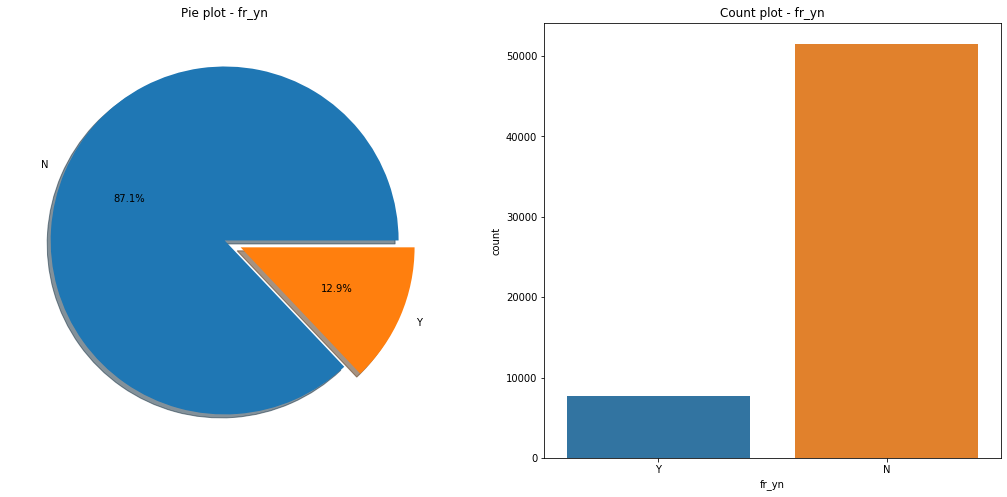

In [11]:
# train Dataset 에서 화재 발생 비율
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['fr_yn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - fr_yn')
ax[0].set_ylabel('')
sns.countplot('fr_yn', data=train, ax=ax[1])
ax[1].set_title('Count plot - fr_yn')

plt.show()

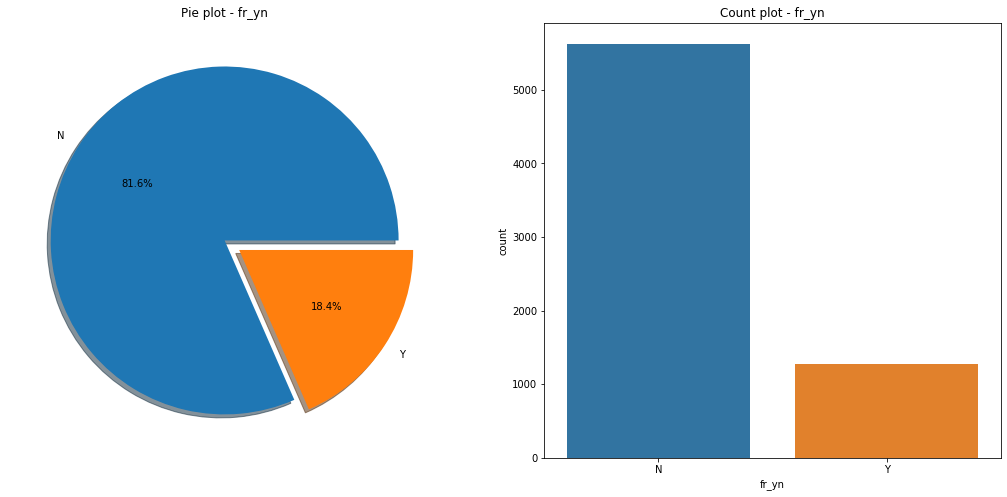

In [12]:
# Validation Dataset 에서 화재 발생 비율
f, ax = plt.subplots(1, 2, figsize=(18, 8))

val['fr_yn'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - fr_yn')
ax[0].set_ylabel('')
sns.countplot('fr_yn', data=val, ax=ax[1])
ax[1].set_title('Count plot - fr_yn')

plt.show()

Target Lable을 살펴본 결과, 하나의 결과값에 치우져있지 않기 때문에 분석하기에 무리가 없는 데이터라고 판단한다.

## <font color='red'>EDA</font>

#### Parse datetime

In [13]:
type(train.dt_of_fr)

pandas.core.series.Series

In [14]:
train["dt_year"] = train["dt_of_fr"].dt.year
train["dt_month"] = train["dt_of_fr"].dt.month
train["dt_day"] = train["dt_of_fr"].dt.day
train["dt_hour"] = train["dt_of_fr"].dt.hour
train["dt_minute"] = train["dt_of_fr"].dt.minute

In [15]:
# dayofweek는 날짜에서 요일(월~일)을 가져오는 기능.
# 값은 0(월), 1(화), 2(수), 3(목), 4(금), 5(토), 6(일) 을 나타냄.
train["dt_dayofweek"] = train["dt_of_fr"].dt.dayofweek

In [16]:
train[["dt_of_fr", "dt_year", "dt_month", "dt_day", "dt_hour", "dt_minute", "dt_dayofweek"]].head()

,dt_of_fr,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_dayofweek
0,2017-10-20 05:54:00,2017,10,20,5,54,4
1,2018-09-30 08:26:00,2018,9,30,8,26,6
2,2016-10-30 14:57:00,2016,10,30,14,57,6
3,2016-06-14 05:23:00,2016,6,14,5,23,1
4,2018-04-22 05:38:00,2018,4,22,5,38,6


validation dataset과 test dataset에도 동일한 작업을 진행하겠다.

In [17]:
val["dt_year"] = val["dt_of_fr"].dt.year
val["dt_month"] = val["dt_of_fr"].dt.month
val["dt_day"] = val["dt_of_fr"].dt.day
val["dt_hour"] = val["dt_of_fr"].dt.hour
val["dt_minute"] = val["dt_of_fr"].dt.minute
val["dt_dayofweek"] = val["dt_of_fr"].dt.dayofweek

In [18]:
test["dt_year"] = test["dt_of_fr"].dt.year
test["dt_month"] = test["dt_of_fr"].dt.month
test["dt_day"] = test["dt_of_fr"].dt.day
test["dt_hour"] = test["dt_of_fr"].dt.hour
test["dt_minute"] = test["dt_of_fr"].dt.minute
test["dt_dayofweek"] = test["dt_of_fr"].dt.dayofweek

년, 월, 일, 시, 분, 초를 기준으로 화재 발생 건수를 확인할 필요가 있다.

In [19]:
print(train.shape)
print(val.shape)
print(test.shape)

(59199, 186)
(6898, 186)
(2957, 186)


In [20]:
year_fire = train[['dt_year', 'fr_yn']]
year_fire = year_fire[year_fire.fr_yn != 'N']
year_fire = year_fire["dt_year"].value_counts().rename_axis('year').reset_index(name='fire_Yes')
year_fire = year_fire.sort_values(["year"], ascending=[True])
year_fire.head()

,year,fire_Yes
3,2014,1388
0,2015,1715
2,2016,1532
1,2017,1675
4,2018,1347


In [21]:
month_fire = train[['dt_month', 'fr_yn']]
month_fire = month_fire[month_fire.fr_yn != 'N']
month_fire = month_fire["dt_month"].value_counts().rename_axis('month').reset_index(name='fire_Yes')
month_fire = month_fire.sort_values(["month"], ascending=[True])
month_fire.head()

,month,fire_Yes
0,1,798
3,2,756
2,3,759
7,4,582
4,5,693


In [22]:
day_fire = train[['dt_day', 'fr_yn']]
day_fire = day_fire[day_fire.fr_yn != 'N']
day_fire = day_fire["dt_day"].value_counts().rename_axis('day').reset_index(name='fire_Yes')
day_fire = day_fire.sort_values(["day"], ascending=[True])
day_fire.head()

,day,fire_Yes
14,1,254
4,2,274
5,3,272
0,4,284
18,5,242


In [23]:
hour_fire = train[['dt_hour', 'fr_yn']]
hour_fire = hour_fire[hour_fire.fr_yn != 'N']
hour_fire = hour_fire["dt_hour"].value_counts().rename_axis('hour').reset_index(name='fire_Yes')
hour_fire = hour_fire.sort_values(["hour"], ascending=[True])
hour_fire.head()

,hour,fire_Yes
18,0,188
19,1,175
21,2,144
20,3,145
22,4,132


In [24]:
minute_fire = train[['dt_minute', 'fr_yn']]
minute_fire = minute_fire[minute_fire.fr_yn != 'N']
minute_fire = minute_fire["dt_minute"].value_counts().rename_axis('minute').reset_index(name='fire_Yes')
minute_fire = minute_fire.sort_values(["minute"], ascending=[True])
minute_fire.head()

,minute,fire_Yes
2,0,149
49,1,114
11,2,137
21,3,133
47,4,117


#### Explore with visualization

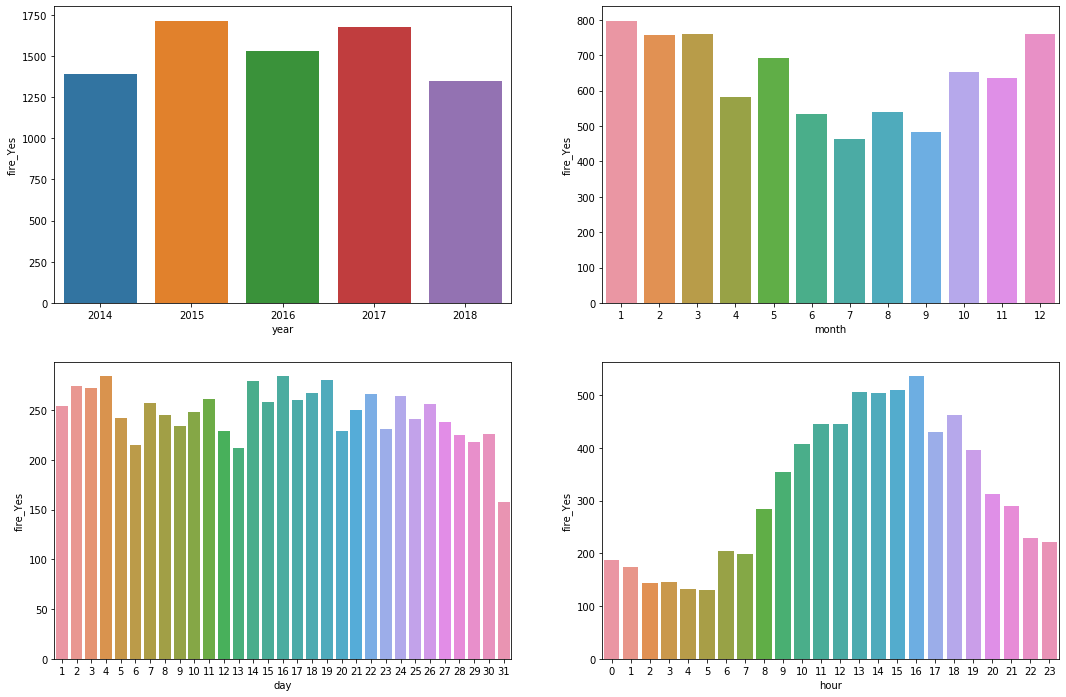

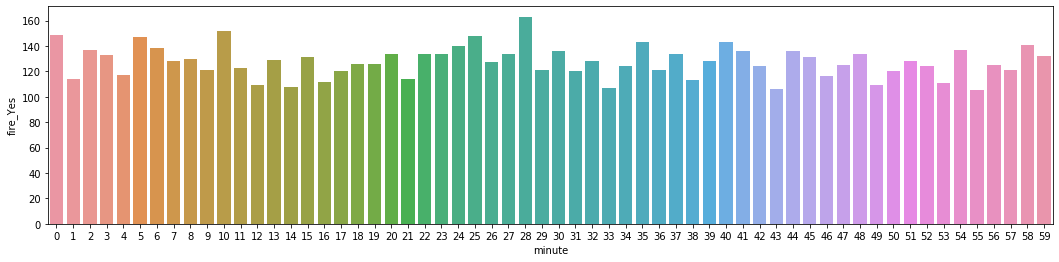

In [25]:
%matplotlib inline

# seaborn의 barplot으로, subplots의 각 구역에 연, 월, 일, 시, 별 화재 발생 건수를 출력

# 2x2, 총 4개의 시각화를 한 화면에 띄우기
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

# 시각화의 전체 사이즈는 18x12로 설정
figure.set_size_inches(18, 12)

sns.barplot(data=year_fire, x="year", y="fire_Yes", ax=ax1)
sns.barplot(data=month_fire, x="month", y="fire_Yes", ax=ax2)
sns.barplot(data=day_fire, x="day", y="fire_Yes", ax=ax3)
sns.barplot(data=hour_fire, x="hour", y="fire_Yes", ax=ax4)

# seaborn의 barplot으로 분 별 화재 발생 건수를 출력
figure, ax5 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)
sns.barplot(data=minute_fire, x="minute", y="fire_Yes", ax=ax5)

위 막대그래프를 통해 알 수 있는 내용은 다음과 같다.

#### year
* 2015년도에 가장 많은 화재가 발생했고 가장 적게 화재가 발생한 2018년과 발생 횟수가 상당히 차이나는 것을 볼 수 있다.<br>
* 그렇지만 연도별 화재 발생 건수에 대한 막대그래프에서 일정한 추세를 확인할 수는 없었다.<br>
* 2015년도와 2017년도가 다른 해에 비해 왜 더 많은 화재가 발생했는지 확인할 수 있다면 그것을 확인해야 할 것이며,<br>
  그렇지 못 하다면 연도별 화재 발생 건수는 분석에 도움이 되지 않을 것으로 보인다.

#### month
* 겨울에서 초봄(12월-3월)사이에 가장 많이 화재가 발생했으며, 여름에서 늦여름(6-9월)까지는 비교적 화재 발생 건수가 적다.
* 5월과 10월, 11월 또한 여름에 비해 화재 발생 건수가 많다. 한창 건조할 봄과 가을이기 때문일 것이다.

#### day
* 월 초와 월 중반이 다른 때에 비해 화재 발생 건수가 많은 것을 확인할 수 있다.
* 그 외의 특정한 추세는 보이지 않으나 31일이 유난히 화재 발생 건수가 적었다.<br>
  당연한 것이, 1년 중 1월, 3월, 5월, 7월, 8월, 10월, 12월만 31일이 있기 때문이다. 크게 문제가 될 것 같진 않아 보인다.

#### hour
* 사람들이 많이 활동하는 시간일수록 화재 발생 건수가 많아지는 추세를 보인다.


#### minute
* 특별한 추세가 보이지 않는다.


#### second
* 화재가 발생한 '초'는 전부 0으로 기록되어 있다. 공모전 주최측에서 second는 활용하지 말라고 하였기에 분석 대상에서 제외한다.

#### <font color="red">결론 : day는 의미없는 데이터로 보이나 일단은 먼저 앙상블 모델에 투입한다. 이후 day를 제거한 모델을 새로 만들어보기로 하자.</font>

## <font color='red'>Feature Engineering</font>

1. 문자로 구성된 value를 binary 혹은 categorical 형태로 변형시키기

In [26]:
# 화재 발생 여부를 나타내는 'fr_yn' column의 value들을 binary로 변환
binary_y = {'N': 0, 'Y': 1}
train['fr_yn'] = train['fr_yn'].map(binary_y)
val['fr_yn'] = val['fr_yn'].map(binary_y)

In [27]:
print(train['fr_yn'].head())
print()
print(val['fr_yn'].head())

0    1
1    0
2    1
3    0
4    0
Name: fr_yn, dtype: int64

0    0
1    0
2    0
3    1
4    0
Name: fr_yn, dtype: int64


In [28]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,dt_year,dt_month,dt_day,dt_hour,dt_minute,dt_dayofweek
0,2017-10-20 05:54:00,1,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,NaN,NaN,NaN,NaN,2017,10,20,5,54,4
1,2018-09-30 08:26:00,0,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,2018,9,30,8,26,6
2,2016-10-30 14:57:00,1,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,NaN,NaN,NaN,NaN,2016,10,30,14,57,6
3,2016-06-14 05:23:00,0,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,NaN,NaN,NaN,NaN,2016,6,14,5,23,1
4,2018-04-22 05:38:00,0,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,4,22,5,38,6


2. 범주형 변수들을 one-hot encoding 방식으로 처리

In [29]:
print(train.shape)
print(val.shape)
print(test.shape)

(59199, 186)
(6898, 186)
(2957, 186)


In [30]:
 # train, val, test를 세로로 아래로 합치기
df_all = pd.concat([train, val, test])

In [31]:
# 컬럼 data type 중 'object'인 것들만 추려내어 컬럼명으로 리스트 만들기
categorical_cols = df_all.select_dtypes(['object']).columns
categorical_cols

Index(['bldng_archtctr', 'bldng_us', 'bldng_us_clssfctn',
       'blk_dngrs_thng_mnfctr_yn', 'cltrl_hrtg_yn', 'dngrs_thng_yn',
       'dt_of_athrztn', 'emd_nm', 'fr_fghtng_fclt_spcl_css_5_yn',
       'fr_fghtng_fclt_spcl_css_6_yn', 'jmk', 'lnd_us_sttn_nm', 'mlt_us_yn',
       'rd_sd_nm', 'rgnl_ar_nm', 'rgnl_ar_nm2', 'slf_fr_brgd_yn', 'trgt_crtr',
       'us_yn'],
      dtype='object')

In [32]:
# data type이 'object'인 각 column을 돌며 value값들을 categorical variable로 변환
for col in categorical_cols:
    df_all[col] = pd.Categorical(df_all[col]).codes

In [33]:
# 다시 train, val, test로 잘라내기
train = df_all[:len(train)]
val = df_all[len(train):-len(test)]
test = df_all[-len(test):]

3. X_train, y_train, X_val, y_val, test dataframe 구성

In [34]:
X_train = train.drop(['fr_yn', 'dt_of_fr'], 1) # train에서 'fr_yn', 'dt_of_fr' column을 drop
y_train = train['fr_yn']
X_val = val.drop(['fr_yn', 'dt_of_fr'], 1) # val에서 'fr_yn', 'dt_of_fr' column을 drop
y_val = val['fr_yn']
test = test.drop(['fr_yn', 'dt_of_fr'], 1) # test에서 'fr_yn', dt_of_fr' column을 drop

4. 각 dataframe의 결측치를 column의 평균값으로 채우기

In [35]:
# 결측치를 가진 row를 제거하는 방식은 X_train의 모든 row를 제거해버리기 때문에 불가능하다.
# 결측치를 column의 평균으로 채운 방식을 활용하도록 한다.
X_train = X_train.fillna(X_train.mean()) 
X_val = X_val.fillna(X_val.mean()) 
test = test.fillna(test.mean())

In [36]:
print(X_train.shape)
print(X_val.shape)
print(test.shape)

(59199, 184)
(6898, 184)
(2957, 184)


## <font color='red'>Train & Evaluate</font> 

#### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
round(math.sqrt(len(X_train.columns)))

14

In [39]:
forest_100 = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest_100.fit(X_train, y_train)
y_pred = forest_100.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5064102564102564
accuracy : 0.8213975065236301


In [40]:
forest_1000 = RandomForestClassifier(n_jobs=-1, n_estimators=1000, random_state=42)
forest_1000.fit(X_train, y_train)
y_pred = forest_1000.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5162337662337662
accuracy : 0.8271962887793564


In [41]:
forest_1000 = RandomForestClassifier(n_jobs=-1, n_estimators=1000, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest_1000.fit(X_train, y_train)
y_pred = forest_1000.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5190965092402464
accuracy : 0.8302406494636126


In [46]:
forest_2000 = RandomForestClassifier(n_jobs=-1, n_estimators=2000, random_state=42, max_features=round(math.sqrt(len(X_train.columns))))
forest_2000.fit(X_train, y_train)
y_pred = forest_2000.predict(X_val)
print('f1 score :', f1_score(y_val, y_pred))
print('accuracy :', accuracy_score(y_val, y_pred))

f1 score : 0.5205702647657842
accuracy : 0.8293708321252536


## <font color='red'>Prediction</font> 

In [47]:
predictions = forest_2000.predict(test)

In [48]:
print(predictions.shape)
predictions[0:20]

(2957,)


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0.])

In [49]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    sns.set_style('darkgrid')
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

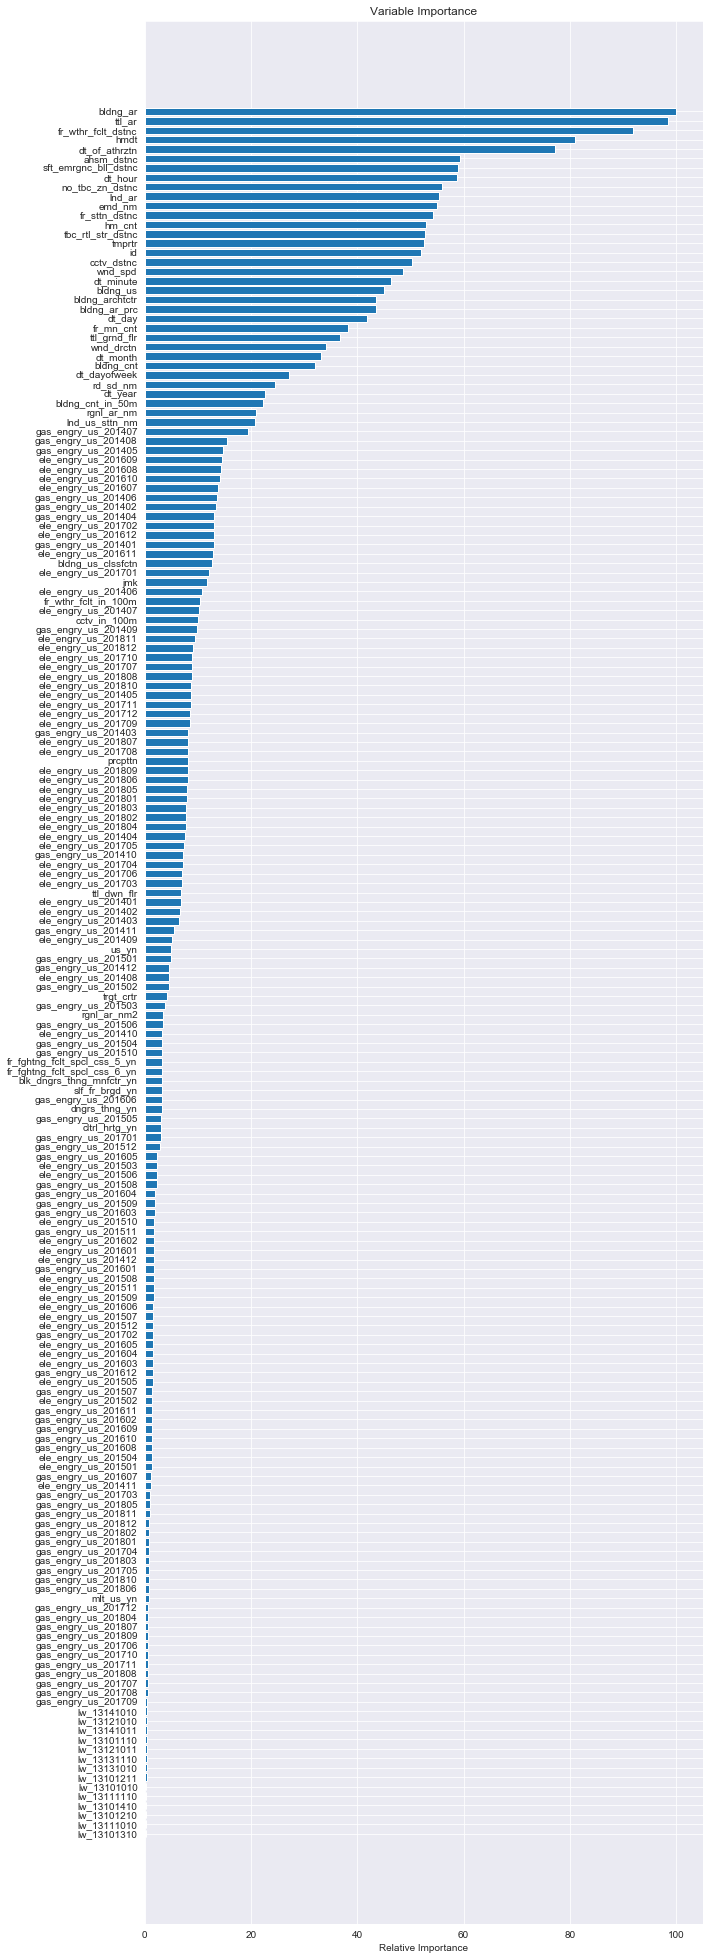

In [53]:
plot_feature_importance(forest_2000, X_train, (10, 35))

## <font color='red'>Prediction</font> 

In [54]:
sub['fr_yn'] = predictions
sub['fr_yn'] = sub['fr_yn'].map({0:'N', 1:'Y'})
sub.head()

,fr_yn
0,N
1,Y
2,N
3,N
4,N


In [55]:
sub.to_csv('yhw8258_화재예측과제_Submission.csv', index=False)